# Preprocessing the scRNA-seq data

In this tutorial is based on the SCENIC+ tutorial:

https://scenicplus.readthedocs.io/en/latest/tutorials.html

with the adjustments made by Liya Zaygerman.

## Download data

The data used for this tutorial is freely available, and can be downloaded from the [10x genomics website](https://www.10xgenomics.com/datasets/frozen-human-healthy-brain-tissue-3-k-1-standard-1-0-0).

In [37]:
import os
# set the base directory
BASE_DIR = '/Users/liya/Documents/Biohack24/SCENIC+' # change this to your base directory

os.chdir(BASE_DIR)
#check what the current working directory is
os.getcwd()

'/Users/liya/Documents/Biohack24/SCENIC+'

In [4]:
!mkdir -p data
!wget -O data/filtered_feature_bc_matrix.tar.gz https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz

--2024-11-07 17:39:51--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170112442 (162M) [application/x-tar]
Saving to: ‘data/filtered_feature_bc_matrix.tar.gz’

data/filtered_featu 100%[===================>] 162.23M  2.36MB/s    in 68s     

2024-11-07 17:41:01 (2.38 MB/s) - ‘data/filtered_feature_bc_matrix.tar.gz’ saved [170112442/170112442]



In [5]:
!cd data; tar -xzf filtered_feature_bc_matrix.tar.gz; cd ..

In [6]:
!wget -O data/cell_data.tsv https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv

--2024-11-07 17:41:02--  https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309204 (302K) [text/plain]
Saving to: ‘data/cell_data.tsv’

data/cell_data.tsv  100%[===================>] 301.96K  --.-KB/s    in 0.05s   

2024-11-07 17:41:02 (6.09 MB/s) - ‘data/cell_data.tsv’ saved [309204/309204]



## Preprocessing

We will do some very basic preprocessing steps, for more information we refer the reader to the [Scanpy tutorials](https://scanpy.readthedocs.io/en/stable/tutorials.html).

In [7]:
import scanpy as sc

In [8]:
adata = sc.read_10x_mtx(
    "data/filtered_feature_bc_matrix/",
    var_names = "gene_symbols"
)

In [9]:
adata.var_names_make_unique()

In [10]:
adata

AnnData object with n_obs × n_vars = 3233 × 36601
    var: 'gene_ids', 'feature_types'

We have already annotated this dataset, this is beyond the scope of this tutorial. We will load this annotation here.

In [11]:
import pandas as pd
cell_data = pd.read_table("data/cell_data.tsv", index_col = 0)
cell_data

,VSN_cell_type,VSN_leiden_res0.3,VSN_leiden_res0.6,VSN_leiden_res0.9,VSN_leiden_res1.2,VSN_sample_id,Seurat_leiden_res0.6,Seurat_leiden_res1.2,Seurat_cell_type
AAACAGCCATTATGCG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),MOL (1),MOL
AAACCAACATAGACCC-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_3 (5),MOL_B_4 (4),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGAAGATGCCTG-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_VIP (7),INH_VIP (6),INH_VIP
AAACCGAAGTTAGCTA-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_2 (0),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGCGTTAGCCAA-1-10x_multiome_brain,MGL,MGL (7),MGL (10),MGL (10),MGL (12),10x_multiome_brain,MGL (8),MGL (9),MGL
...,...,...,...,...,...,...,...,...,...
TTTGTGAAGGGTGAGT-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_SST (5),INH_SST (8),INH_SST
TTTGTGAAGTCAGGCC-1-10x_multiome_brain,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_1 (7),10x_multiome_brain,BG (2),BG (2),BG
TTTGTGGCATGCTTAG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_1 (1),10x_multiome_brain,MOL (0),MOL (1),MOL
TTTGTTGGTGATCAGC-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_1 (11),10x_multiome_brain,NFOL (1),NFOL (3),NFOL


We modify the index of this cell type annotation dataframe so that the cell barcode names match with those in the AnnData object.

In [12]:
cell_data.index = [cb.rsplit("-", 1)[0] for cb in cell_data.index]

In [13]:
adata = adata[list(set(adata.obs_names) & set(cell_data.index))].copy()

In [14]:
adata.obs = cell_data.loc[adata.obs_names]

In [15]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

### Data normalization

It's important to save the **non normalized** and **non scaled** matrix in the raw slot!

In [16]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/opt/homebrew/anaconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
adata.obs

,VSN_cell_type,VSN_leiden_res0.3,VSN_leiden_res0.6,VSN_leiden_res0.9,VSN_leiden_res1.2,VSN_sample_id,Seurat_leiden_res0.6,Seurat_leiden_res1.2,Seurat_cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
TGGACGGAGCTCGCTT-1,MGL,MGL (7),MGL (10),MGL (10),MGL (12),10x_multiome_brain,MGL (8),MGL (9),MGL,1539,3058.0,5.0,0.163506
CCGGTAGGTAGCCTAA-1,AST,AST+ENDO (9),AST+ENDO (6),AST+ENDO (13),AST (15),10x_multiome_brain,AST+ENDO (6),AST (7),AST,683,1020.0,0.0,0.000000
TGGCTATAGGCTTAGT-1,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_2 (5),10x_multiome_brain,BG (2),BG (2),BG,2276,4820.0,4.0,0.082988
TCCGGTAAGTTCCTCA-1,PURK,PURK (10),PURK (12),PURK (14),PURK (16),10x_multiome_brain,PURK (10),PURK (13),PURK,6452,32311.0,17.0,0.052614
GACATAGAGTTTAACG-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_3 (5),MOL_B_4 (4),10x_multiome_brain,NFOL (1),NFOL (3),NFOL,3025,12765.0,36.0,0.282021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTCAGGAGGTAAGCA-1,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_2 (0),10x_multiome_brain,MOL (0),MOL (0),MOL,2266,5456.0,15.0,0.274927
TAGCAGGCAGTAATAG-1,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_3 (5),MOL_B_4 (4),10x_multiome_brain,NFOL (1),NFOL (3),NFOL,3189,12924.0,3.0,0.023213
TTAGCCTGTTCCGCAC-1,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_2 (5),10x_multiome_brain,BG (2),BG (2),BG,3136,7575.0,4.0,0.052805
TAAGCTATCACCAATA-1,ASTP,AST_CER (2),AST+ENDO (6),AST_PRO (11),ASTP (13),10x_multiome_brain,AST+ENDO (6),AST (7),MG,3228,8245.0,4.0,0.048514


/opt/homebrew/anaconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


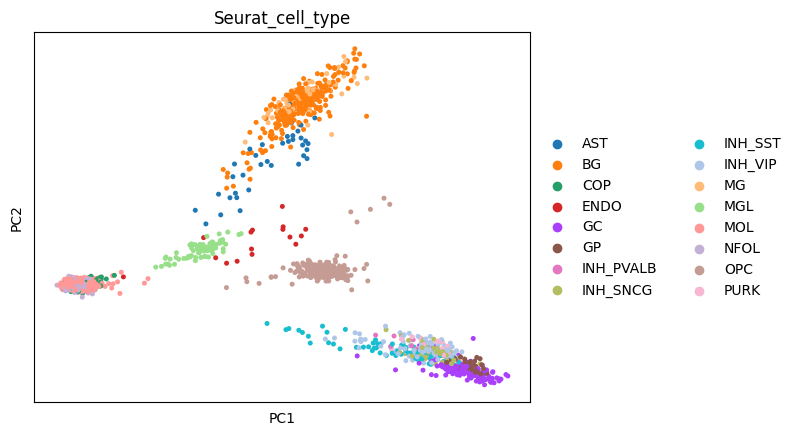

In [18]:
sc.tl.pca(adata)
sc.pl.pca(adata, color = "Seurat_cell_type")

In [19]:
sc.pp.neighbors(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [20]:
sc.tl.umap(adata)

/opt/homebrew/anaconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


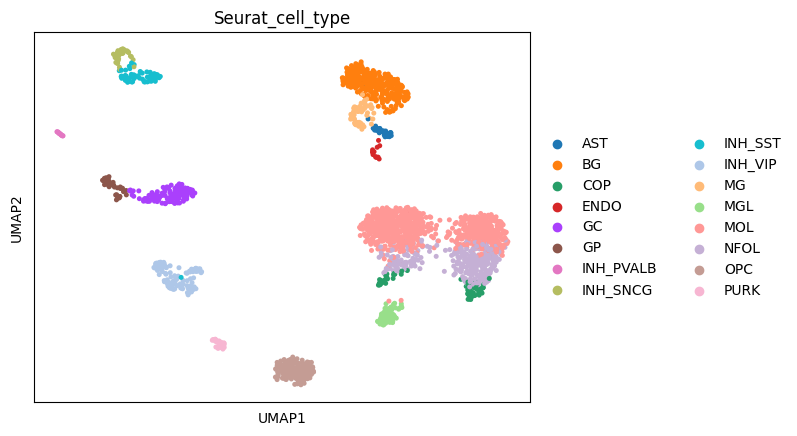

In [21]:
sc.pl.umap(adata, color = "Seurat_cell_type")

In [22]:
adata.write("adata.h5ad")



## To quick check which genes are present

In [29]:
# read the adata object
import anndata as ad
adata = ad.read_h5ad("adata.h5ad")

In [36]:
if "TP53" in adata.var_names:
    print("TP53 is present in adata.")
else:
    print("TP53 is not present in adata.")


TP53 is present in adata.
